# Evaluate Solvers and Thread Number Setting for Numerical Performance

This script evaluates the comutational performance of a given model for different amount of threads and solver types.

In [1]:
import time
import pandas as pd
import matplotlib.pyplot as plt

import ifm
ifm.getKernelVersion()

7500

## Run Tests

In [2]:
# define the list of solver types to be tested (note that petsc is available from FEFLOW 7.500)
solver_list =  ["pardiso", "pcg", "petsc_ksp","petsc_amg"]

# define list of thread numbers to be used for matrix assembly (in this case, all tests are single-threaded)
cpu_thrds_list = [0]

# note: 0 - single-threaded, 1 - multi-threaded with one thread. 
# This is not the same! (single-threaded usually the faster option)

# define list of thread numbers to be used for matrix solution
solver_thrds_list = range(5)

# every test will be repeated a number of set time to reduce system influence
number_of_repitions = 4

# iterate over all combinations of solvers and thread numbers 
log = []
for i in range(number_of_repitions):
    for solver in solver_list:     
        for cpu_thrds in cpu_thrds_list:
            for solver_thrds in solver_thrds_list:
                print((cpu_thrds, solver_thrds, solver))

                # load the model (adjust the filename)
                doc = ifm.loadDocument("./femdata/mymodel.fem")

                # do solver and threading settings
                ifm.setThreads(cpu_thrds, solver_thrds)
                doc.setSolver(solver)

                # measure time, run model
                start = time.time()
                doc.startSimulator()
                end = time.time()
                
                # close model
                doc.closeDocument()

                # calclate and store time
                simtime = end - start
                log.append((cpu_thrds, solver_thrds, solver, simtime))    

# convert to data frame and save to Excel
df_log = pd.DataFrame(log, columns=["threads_cpu", "threads_solver", "solver", "time"])
df_log.to_excel("./new_data.xlsx")

## Evaluate Results

In [16]:
# load the results
df = pd.read_excel("./results.xlsx", index_col=0)

array(['pardiso', 'pcg', 'petsc_ksp', 'petsc_amg', 'samg'], dtype=object)

(0.0, 117.00288448333735)

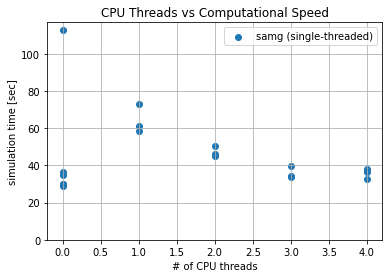

In [41]:
# visualize results - example: SAMG with multiple solver thread number settings
plt.scatter(df[(df.solver=="samg")&(df.threads_solver==0)].threads_cpu, 
            df[(df.solver=="samg")&(df.threads_solver==0)].time, 
                label="samg (single-threaded)")
plt.title("CPU Threads vs Computational Speed")
plt.xlabel("# of CPU threads")
plt.ylabel("simulation time [sec]")
plt.grid()
plt.ylim((0, None))
plt.legend()

(0.0, 200.59524089097977)

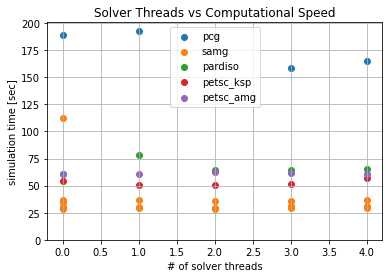

In [34]:
# visualize results - example: SAMG with multiple solver thread number settings
for solver in ['pcg', 'samg', 'pardiso', 'petsc_ksp', 'petsc_amg']:
    plt.scatter(df[(df.solver==solver)&(df.threads_cpu==0)].threads_solver, 
                df[(df.solver==solver)&(df.threads_cpu==0)].time, 
                label=solver)
plt.title("Solver Threads vs Computational Speed")
plt.xlabel("# of solver threads")
plt.ylabel("simulation time [sec]")
plt.grid()
plt.ylim((0, None))
plt.legend()